In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
from sklearn import ensemble

import matplotlib
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [2]:
data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/epi_r.csv') 
display(data.head(5))

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
from pandas import DataFrame
data['rating2'] = data['rating'].apply(lambda x: 1 if x > 3 else 0)
print (data)

                                                   title  rating  calories  \
0                        Lentil, Apple, and Turkey Wrap    2.500     426.0   
1            Boudin Blanc Terrine with Red Onion Confit    4.375     403.0   
2                          Potato and Fennel Soup Hodge    3.750     165.0   
3                       Mahi-Mahi in Tomato Olive Sauce    5.000       NaN   
4                              Spinach Noodle Casserole    3.125     547.0   
5                                         The Best Blts    4.375     948.0   
6      Ham and Spring Vegetable Salad with Shallot Vi...   4.375       NaN   
7                                  Spicy-Sweet Kumquats    3.750       NaN   
8                                 Korean Marinated Beef    4.375     170.0   
9      Ham Persillade with Mustard Potato Salad and M...   3.750     602.0   
10         Yams Braised with Cream, Rosemary and Nutmeg    3.750     256.0   
11                                    Spicy Noodle Soup    4.375

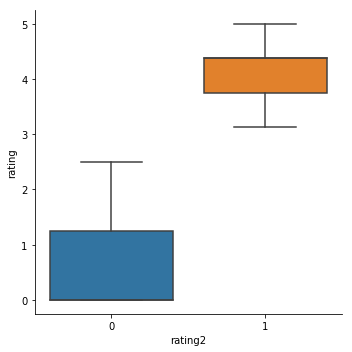

In [5]:
import seaborn as sns

sns.catplot(x='rating2', y='rating', kind='box',  data= data)

set ratings below 3 is a 0 and above a 3 is a 1. create a boxplot to see where the values lie after setting 0 and 1 and then use the features that fall into that rating. then use a binary model - logistic regression or knn

In [6]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=1)
X = data[['rating2', 'rating']]
Y = data.title
neighbors.fit(X,Y)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [7]:
neighbors.predict([[1, 4]])

array(['Corn and Oyster Bisque '], dtype=object)